In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
stock = "CVX"
df = pd.DataFrame(yf.download(stock, '2010-01-01', '2022-12-31')["Close"])

[*********************100%***********************]  1 of 1 completed


In [12]:
def conv1d(a, w, b = 0, stride = 1, pad = 0):
    """
    compute 1d convolutional (with bias)
    """
    w_old = a.shape[0]
    f = w.shape[0]
    a_pad = np.pad(a, pad_width=pad, mode = 'constant', constant_values = 0)
    w_new = int((w_old - f + 2*pad)/stride) + 1 
    a_res = np.zeros((w_new))
    for i in range(w_new):
        start = i*stride
        end = start + f
        a_res[i] = np.sum(a_pad[start:end]*w) + b 
    return a_res 

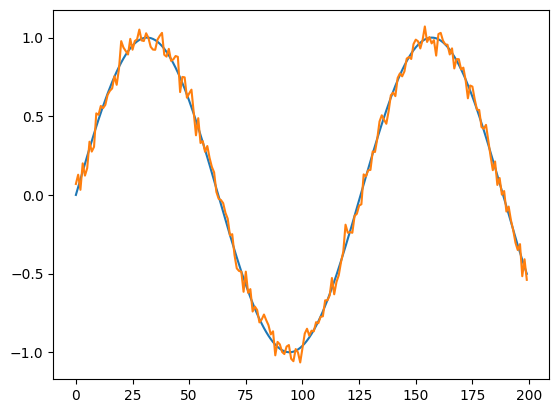

In [25]:
import numpy as np
import matplotlib.pyplot as plt
N = 200
x_clean = np.sin(np.arange(N)/20.)
x_noisy = x_clean + .05*np.random.randn(N)
plt.plot(x_clean)
plt.plot(x_noisy)

In [41]:
x_noisy=df.values.reshape(1,-1)[0]
x_noisy

array([ 79.05999756,  79.62000275,  79.62999725, ..., 176.97999573,
       178.32000732, 179.49000549])

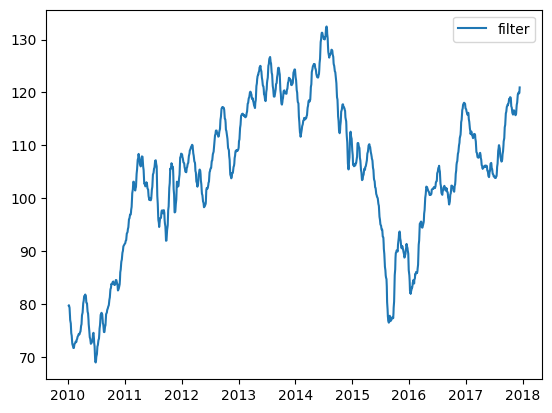

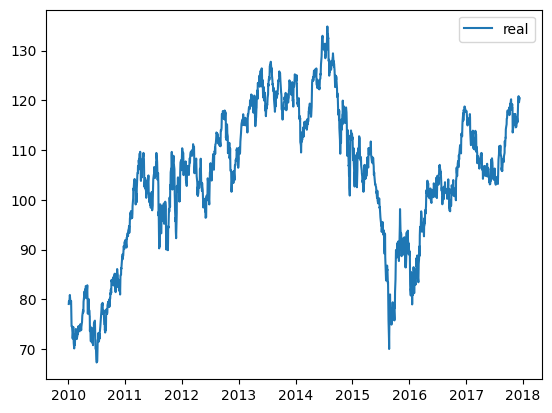

In [62]:
w = 1./10*np.ones(10)
x_filtered = conv1d(x_noisy, w)
n =2000
plt.plot(df.index[2:][:n],x_filtered[:n], label="filter")
plt.legend()
plt.show()

plt.plot(df[:n], label="real")
plt.legend()

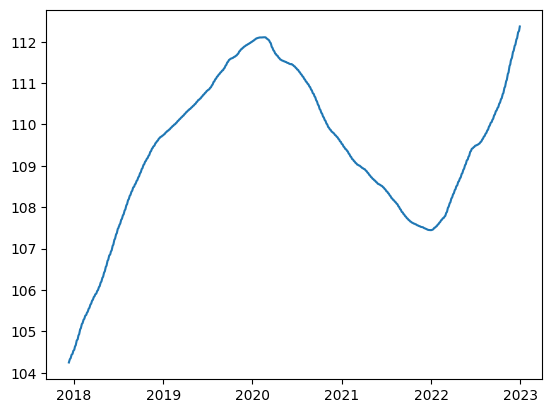

In [3]:
def rolling(lag, data):
    A = []
    df = data.tolist()
    for i in range(lag, len(df)):
        A.append(df[i-lag:i]) 
    return pd.DataFrame(A)

def UoD(x):
    if x<0:
        return -1
    if x>0:
        return 1
    else: 
        return 0

def NN(x,y, input_dim, out_dim):
		model = Sequential()
		model.add(Dense(100, input_dim = input_dim, activation="sigmoid"))
		model.add(Dense(100, input_dim = 100, activation="sigmoid"))
		model.add(Dense(100, input_dim = 100, activation="sigmoid"))
		model.add(Dense(out_dim, input_dim = 5, activation="softmax"))

		optimizer=Adam()
		model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

		model.fit(x, y, epochs=200, verbose=2)
		return model

In [9]:
df["returns"] =df["Close"].pct_change()
df["UoD"]= df["returns"].map(UoD)
df.dropna(inplace=True)
lag = 10
A = rolling(lag, df["returns"])
b = df["UoD"].shift(-lag)[:-lag]


encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(b).reshape(-1, 1)).toarray()
deon, dete, keyon, keyte = train_test_split(A.values,y, test_size=0.5)

In [10]:
a = NN(deon,keyon,lag,3)

Epoch 1/200
51/51 - 1s - loss: 0.8519 - accuracy: 0.4374 - 575ms/epoch - 11ms/step
Epoch 2/200
51/51 - 0s - loss: 0.7132 - accuracy: 0.5000 - 111ms/epoch - 2ms/step
Epoch 3/200
51/51 - 0s - loss: 0.7145 - accuracy: 0.4994 - 110ms/epoch - 2ms/step
Epoch 4/200
51/51 - 0s - loss: 0.7124 - accuracy: 0.5012 - 97ms/epoch - 2ms/step
Epoch 5/200
51/51 - 0s - loss: 0.7159 - accuracy: 0.5025 - 98ms/epoch - 2ms/step
Epoch 6/200
51/51 - 0s - loss: 0.7107 - accuracy: 0.5313 - 95ms/epoch - 2ms/step
Epoch 7/200
51/51 - 0s - loss: 0.7116 - accuracy: 0.4957 - 94ms/epoch - 2ms/step
Epoch 8/200
51/51 - 0s - loss: 0.7147 - accuracy: 0.4926 - 104ms/epoch - 2ms/step
Epoch 9/200
51/51 - 0s - loss: 0.7190 - accuracy: 0.4785 - 87ms/epoch - 2ms/step
Epoch 10/200
51/51 - 0s - loss: 0.7135 - accuracy: 0.4748 - 112ms/epoch - 2ms/step
Epoch 11/200
51/51 - 0s - loss: 0.7123 - accuracy: 0.5098 - 93ms/epoch - 2ms/step
Epoch 12/200
51/51 - 0s - loss: 0.7138 - accuracy: 0.4883 - 87ms/epoch - 2ms/step
Epoch 13/200
51/51 

In [14]:
d=a.predict(dete)
d

51/51 [==============================] - 0s 2ms/step


array([[0.50590086, 0.00244201, 0.49165714],
       [0.5059009 , 0.00244214, 0.49165696],
       [0.5058987 , 0.00244204, 0.49165922],
       ...,
       [0.5059011 , 0.00244218, 0.49165675],
       [0.5058996 , 0.00244185, 0.4916585 ],
       [0.50589937, 0.00244192, 0.4916587 ]], dtype=float32)